# Data Optimizations, Does it Really Matter?

In this notebook, we’ll explore how small code optimizations and best practices can lead to significant improvements in performance. By making seemingly minor adjustments, we can speed up workflows, reduce resource usage, and improve overall efficiency—both on our local machines and in production environments.

We'll also walk through a real-world example showing how a simple change, like specifying data types during CSV import, can save substantial time and money when scaled across an entire year.

### **Table of Contents**
* [Data Optimizations, Does it Really Matter?](#data-optimizations,-does-it-really-matter?)
  * [Real-World Example: The Cost of Not Optimizing](#real-world-example:-the-cost-of-not-optimizing)
  * [Use Case: The Job](#use-case:-the-job)
  * [Two Approaches](#two-approaches)
    * [Inefficient Approach:](#inefficient-approach:)
    * [Optimized Approach:](#optimized-approach:)
  * [Estimated Time Savings](#estimated-time-savings)
  * [Infrastructure Cost Savings](#infrastructure-cost-savings)
  * [Conclusion](#conclusion)
* [Pandas Data Types Cheat Sheet](#pandas-data-types-cheat-sheet)
  * [Numeric Types](#numeric-types)
  * [String and Categorical](#string-and-categorical)
  * [Date/Time](#date/time)
  * [Boolean](#boolean)
  * [Pro Tips](#pro-tips)
  * [Summary Table](#summary-table)


## Real-World Example: The Cost of Not Optimizing

Let’s look at a simple yet common task: 
- loading and preprocessing a dataset with **15 million rows and 9 columns**. 

This could represent something like:
- Daily logs from IoT sensors, web traffic, or transactional data across multiple business units.

## Use Case: The Job

Imagine this ETL (Extract, Transform, Load) task is run:
- **4 times per day** (hourly imports + daily reprocessing)
- **365 days per year**
- That’s **1,460 executions annually**



## Two Approaches

Here we will look at 2 different approaches doing the task. One will be less idea and the other optimized. 

### Inefficient Approach:
Loading the data manually and letting pandas infer data types:

```python
df = pd.read_csv("data.csv")
```
Takes ~12.4 seconds on average per run

High memory footprint due to object and float64 defaults


### Optimized Approach:
Using a function to apply predefined types on import:

```python
def load_typed_df(path):
    dtypes = {
        "id": "int32",
        "status": "category",
        "timestamp": "datetime64[ns]",
        "sensor_1": "float32",
        "sensor_2": "float32",
        # and so on...
    }
    return pd.read_csv(path, dtype=dtypes, parse_dates=["timestamp"])
```

Takes ~3.2 seconds on average

Uses less than half the memory

#### Estimated Time Savings
| Metric |	Value | 
|:----: | :-----: | 
| Time saved per run | 9.2 seconds |
| Runs per year | 1,460 |
| Total time saved per year | 13,432 seconds (~3.7 hours) |

## Infrastructure Cost Savings
Let’s assume this process runs on a cloud machine costing $0.05 per minute (e.g., AWS EC2 or Databricks jobs):
- 3.7 hours saved × $3.00/hour = ~$11.10 saved per year per script

In a modern data pipeline with dozens of similar jobs, the savings scale exponentially:
- 25 such jobs × $11.10 = $277.50/year
- 100 jobs = $1,110/year, just from applying types and function reuse

## Conclusion
What seems like a small tweak, predefining data types and using a reusable function, leads to:
- Dramatically faster load times
- Lower memory usage
- Real infrastructure cost savings
- More readable and maintainable code
- These optimizations are easy wins in any production pipeline.


--- 



---

# Pandas Data Types Cheat Sheet

Optimize performance and memory in your data analysis by explicitly setting column types.

---

## Numeric Types

| Pandas dtype | Python equivalent | When to use                     | Memory-efficient? |
|--------------|--------------------|----------------------------------|--------------------|
| `int64`      | `int`              | Default for integers             | ❌ No              |
| `int32`      | `int`              | Smaller integers (±2B)           | ✅ Yes             |
| `int8`       | `int`              | Small values or flags (0/1)      | ✅ Yes             |
| `float64`    | `float`            | Default for floats               | ❌ No              |
| `float32`    | `float`            | Lower-precision floats           | ✅ Yes             |
| `float16`    | `float`            | Large arrays, limited precision  | ✅⚠️ Yes           |

---

## String and Categorical

| Pandas dtype | When to use                              | Notes                          |
|--------------|-------------------------------------------|--------------------------------|
| `object`     | Default for strings/mixed types           | ❌ Slow, memory-heavy          |
| `string`     | New dedicated string type                 | Safer than `object`           |
| `category`   | Repeating text values (e.g. country)      | ✅ Great for groupby/filtering |

```python
df["gender"] = df["gender"].astype("category")
```

---

## Date/Time

| Pandas dtype      | When to use               | Notes                     |
|-------------------|----------------------------|---------------------------|
| `datetime64[ns]`  | Date/time values           | Use `pd.to_datetime()`    |
| `timedelta64[ns]` | Durations or differences   | Use `pd.to_timedelta()`   |

```python
df["date"] = pd.to_datetime(df["date"], errors="coerce")
```

---

## Boolean

| Pandas dtype | When to use        | Notes                          |
|--------------|--------------------|--------------------------------|
| `bool`       | True/False          | ✅ Very efficient               |
| `boolean`    | With missing values | Use for nullable booleans      |

```python
df["is_active"] = df["is_active"].astype("bool")
```

---

## Pro Tips

- **Set types when loading CSVs**
```python
pd.read_csv("file.csv", dtype={"id": "int32", "gender": "category"})
```

- **Downcast numerics**
```python
df["score"] = pd.to_numeric(df["score"], downcast="float")
df["id"] = pd.to_numeric(df["id"], downcast="integer")
```

- **Check memory usage**
```python
df.info(memory_usage="deep")
```

---

## Summary Table

| Column Type | Best dtype         | Why                          |
|-------------|--------------------|-------------------------------|
| IDs         | `int32`/`int64`    | Save memory, keep accuracy    |
| Flags       | `bool`/`int8`      | Small and efficient           |
| Categories  | `category`         | Speeds up groupby/filtering   |
| Prices      | `float32`          | Good enough for most floats   |
| Dates       | `datetime64[ns]`   | Enables time-based filtering  |
| Short text  | `category`/`string`| Faster than `object`          |
| Long text   | `object`           | Only real option (for now)    |

---

> Use `astype()` or `dtype=` to control types and avoid surprises.

--- 
--- 

# Getting started! 

In [66]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

Let’s generate a large set of synthetic data to work with for this example. If you encounter performance issues, I’ll point out where you can adjust the size of the dataset to better suit your machine’s capabilities.

In [ ]:
import data_maker

# Generate a file with 5,500,000 rows
# change the number of rows to suit your machine's capabilities
data_maker.create_tricky_csv(num_rows=50000, output_filename='my_tricky_data.csv')

Generating a dataset with 5500000 rows...
DataFrame created. Now saving to 'my_tricky_data.csv'...
Save complete.


,id,mixed_numeric,boolean_like,date_like,categorical_noise,mostly_empty
0,0,4114,0,2020-08-19,alpha,NaN
1,1,4328,N/A,2022-03-08,epsilon,NaN
2,2,3936,True,07/26/2020,alpha,NaN
3,3,4275,,"Jul 14, 2021",epsilon,NaN
4,4,5210,false,03/16/2023,epsilon,NaN
...,...,...,...,...,...,...
5499995,5499995,2431,N/A,2024-01-01,beta,NaN
5499996,5499996,7194,1,2021-04-09,delta,NaN
5499997,5499997,9048,yes,2024-10-26,delta,NaN
5499998,5499998,1613,0,"Jan 27, 2020",epsilon,NaN


In [68]:
%%timeit
df = pd.read_csv('my_tricky_data.csv')

1.4 s ± 77.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Copy your output and paste it to the variable `standard_import_time` and rerun that cell

In [69]:
standard_import_time = "1.29 s ± 15.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)"

In [70]:
%%timeit

dtypes = {
    'id': 'int32',
    'mixed_numeric': 'object',
    'boolean_like': 'category',
    'date_like': 'object',
    'categorical_noise': 'category',
    'mostly_empty': 'float32'
}
df_fast = pd.read_csv('my_tricky_data.csv', dtype=dtypes)

1.35 s ± 84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Copy your output and paste it to the variable `dtype_import_time` and rerun that cell

In [71]:
dtype_import_time = "1.27 s ± 6.46 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)"

In [72]:
# The slow/memory-heavy way
df = pd.read_csv('my_tricky_data.csv')
print("--- Inferred Dtypes ---")
df.info(memory_usage='deep')

# The fast/memory-efficient way
dtypes = {
    'id': 'int32',
    'mixed_numeric': 'object',
    'boolean_like': 'category',
    'date_like': 'object',
    'categorical_noise': 'category',
    'mostly_empty': 'float32'
}
df_fast = pd.read_csv('my_tricky_data.csv', dtype=dtypes)
print("\n--- Specified Dtypes ---")
df_fast.info(memory_usage='deep')

--- Inferred Dtypes ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500000 entries, 0 to 5499999
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id                 int64  
 1   mixed_numeric      object 
 2   boolean_like       object 
 3   date_like          object 
 4   categorical_noise  object 
 5   mostly_empty       float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2 GB

--- Specified Dtypes ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500000 entries, 0 to 5499999
Data columns (total 6 columns):
 #   Column             Dtype   
---  ------             -----   
 0   id                 int32   
 1   mixed_numeric      object  
 2   boolean_like       category
 3   date_like          object  
 4   categorical_noise  category
 5   mostly_empty       float32 
dtypes: category(2), float32(1), int32(1), object(2)
memory usage: 663.1 MB


Copy your output for memory usage and paste it to the variables below then rerun the cell

In [73]:
standard_import_memory = "memory usage: 1.2 GB"
dtype_import_memory = "memory usage: 663.1 MB"

## Plotting your performance 

Run the cell below after you update your variables and see how much of an impact this had on your machine.

Parsing results and generating plots...


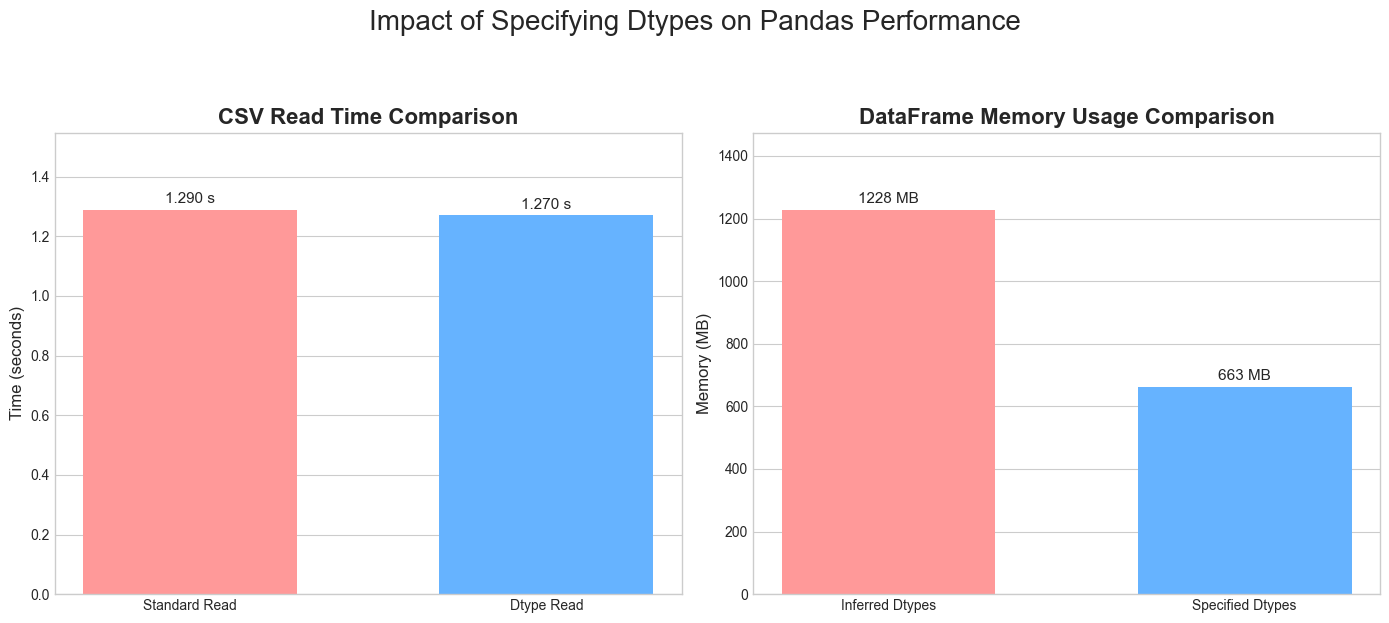

In [74]:
from plot_tool import plot_benchmark_results

plot_benchmark_results(
    standard_import_time,
    dtype_import_time,
    standard_import_memory,
    dtype_import_memory
)

# What this means

I saw very little difference in the read time on my machine being a **20ms** difference. However I saw a dramatic difference in the memory usage. We achieved a **~46%** reduction in memory usage by declaring the data types on import. 

## Impact in an AWS Production Environment
A 46% memory reduction is not just a minor improvement in an AWS environment. It's a massive win that has direct and significant impacts on cost, performance, and stability.

### Here’s how this would affect a script running in production:
Direct Cost Savings
- Most AWS services are billed based on resource consumption (memory and CPU) over time.

- AWS Lambda: If this script runs in a Lambda function, you are billed for the memory allocated per millisecond of runtime (GB-seconds). Cutting memory usage by 46% could nearly halve the cost of every execution.

- AWS Fargate / ECS (Containers): You provision container tasks with specific memory limits (e.g., 2 GB). With this optimization, you could run your task in a 1 GB container instead of a 2GB one. This directly cuts the cost and allows you to pack more containers onto your underlying infrastructure, improving efficiency.

- EC2 Instances (Virtual Servers): If this job is a major part of an application running on an EC2 instance, you could choose a smaller, cheaper instance type. Moving from a memory-optimized instance to a general-purpose one, or simply a smaller size, results in direct hourly savings.

- AWS Glue: For serverless ETL jobs, you are billed by the DPU (Data Processing Unit) hour. More memory-efficient code means your job can process more data per DPU or finish faster, directly reducing your AWS Glue bill.

### Improved Performance and Scalability
- Faster Downstream Processing: While the initial file read time was similar, any subsequent operations on the DataFrame (calculations, aggregations, filtering) are significantly faster on columns with proper numeric or categorical dtypes compared to the generic object dtype. This reduces the total job runtime, which also lowers costs.

- Better Scalability: When your service needs to scale out to handle more traffic, each new instance or container requires less memory. This makes scaling cheaper and reduces the risk of hitting service limits that could prevent your application from scaling when needed.

### Increased Stability and Reliability
- Avoiding OutOfMemory Errors: This is the most critical point. In a production environment, running out of memory is a common cause of failed jobs and application crashes. By cutting your memory footprint by nearly half, you drastically reduce the risk of these errors, making your entire application more robust and reliable.

- Predictable Resource Profile: A job with a lower, more predictable memory usage is easier to manage and operate. You can be more confident in your resource allocation and less likely to have one memory-intensive job negatively impact other services running on the same machine.

In short, while a 20ms time saving on your laptop seems trivial, a 46% memory reduction in a pay-as-you-go cloud environment is a major engineering achievement that leads to a cheaper, faster, and more stable product.

--- 

# How to do this yourself 

Let’s walk through a simple example to see how we can build up to this point. We'll cover a basic workflow that makes this process possible. While it's tempting to assign data types by manually inspecting a dataset, that's not always the most effective or scalable approach. Instead, we can determine the appropriate data types as part of our exploratory data analysis (EDA). As we learn more about the data, we can iterate on our code—refining and cleaning it along the way to keep everything organized and efficient.

In [75]:
data = {
    "Name": ["Alice", "Bob", "Charlie", "Diana"],
    "Age": ["25", "30", "35", None],  # Notice: Age is stored as strings and one missing value
    "Member": ["Yes", "No", "Yes", "No"],  # Could be a boolean
    "JoinDate": ["2023-01-15", "2022-06-01", "2021-11-23", "not available"],  # Needs conversion
    "Score": [88.5, "92.0", 79, "N/A"]  # Mixed types
}

df = pd.DataFrame(data)
df.to_csv('lil_data.csv') # Save the DataFrame to a CSV file for later use

He we have a very basic dataset. I made some notes so that we can see the issues. 

In [76]:
df

,Name,Age,Member,JoinDate,Score
0,Alice,25,Yes,2023-01-15,88.5
1,Bob,30,No,2022-06-01,92.0
2,Charlie,35,Yes,2021-11-23,79
3,Diana,None,No,not available,N/A


In [77]:
df.dtypes

Name        object
Age         object
Member      object
JoinDate    object
Score       object
dtype: object

2 ways to look at types

**Observation:** Everything is an object! 
- This is because each column contains at least one non-numeric value (or numbers stored as strings). 
- This is our signal to investigate each one.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      4 non-null      object
 1   Age       3 non-null      object
 2   Member    4 non-null      object
 3   JoinDate  4 non-null      object
 4   Score     4 non-null      object
dtypes: object(5)
memory usage: 292.0+ bytes


In [79]:
df['Age'].unique()

array(['25', '30', '35', None], dtype=object)

**Conclusion:** 
- These are clearly numbers
- The None value means we'll need a nullable integer type
- Ideal Type: `Int64`

In [80]:
df['Member'].value_counts()

Member
Yes    2
No     2
Name: count, dtype: int64

**Conclusion:** 
- This is a binary choice with very few unique values  
- Ideal Type: category (or boolean if we map 'Yes'/'No' to True/False)

In [81]:
df['JoinDate'].unique()

array(['2023-01-15', '2022-06-01', '2021-11-23', 'not available'],
      dtype=object)

**Conclusion:** 
- Most of these are dates
- There's a problem string ("not available")
- Ideal Type: datetime64.

In [82]:
df['Score'].unique()

array([88.5, '92.0', 79, 'N/A'], dtype=object)

**Conclusion:** 
- A mix of floats and integers
- With a problem string ('N/A')
- Ideal Type: `float64`

## The Optimized Import Strategy

Now that we know the ideal types, we can build a strategy to load a large CSV version of this data efficiently.

The key is to understand that `pd.read_csv` cannot perform data cleaning. If a column contains values that dont match the dtype you specify, it will fail. Therefore, the best strategy is a two-step process:

Read the CSV with an initial dtype dictionary, loading problematic columns as object.

Clean and convert the problematic columns after they are loaded into memory.


- Name: string - Use the modern string dtype for text
- Age: object - Must load as object to handle string-to-int conversion
- Member: category - Perfect for low-cardinality text
- JoinDate: object - Must load as object to handle not available
- Score: object - Must load as object to handle N/A

In [83]:
best_dtypes = {
    'Name': 'string',
    'Age': 'object',
    'Member': 'category',
    'JoinDate': 'object',
    'Score': 'object'
}

missing_values = ['N/A', 'not available']

df_optimized = pd.read_csv('lil_data.csv', dtype=best_dtypes, na_values=missing_values)

df_optimized

,Unnamed: 0,Name,Age,Member,JoinDate,Score
0,0,Alice,25,Yes,2023-01-15,88.5
1,1,Bob,30,No,2022-06-01,92.0
2,2,Charlie,35,Yes,2021-11-23,79
3,3,Diana,NaN,No,NaN,NaN


With the data successfully loading, the next step is to turn this process into a function so it can be reused easily.

In [84]:
def load_data_with_optimized_dtypes(file_path):
    best_dtypes = {
        'Name': 'string',
        'Age': 'object',
        'Member': 'category',
        'JoinDate': 'object',
        'Score': 'object'
    }
    
    missing_values = ['N/A', 'not available']
    
    return pd.read_csv(file_path, dtype=best_dtypes, na_values=missing_values)

# Example usage
df_optimized = load_data_with_optimized_dtypes('lil_data.csv')
df_optimized

,Unnamed: 0,Name,Age,Member,JoinDate,Score
0,0,Alice,25,Yes,2023-01-15,88.5
1,1,Bob,30,No,2022-06-01,92.0
2,2,Charlie,35,Yes,2021-11-23,79
3,3,Diana,NaN,No,NaN,NaN


We're almost there! Now it's time to take things up a notch by adding type hints and docstrings! Hallmarks of clean, professional Python code. As you can see below we are missing information when we try to get more info on our function. 

In [85]:
load_data_with_optimized_dtypes?

Signature: load_data_with_optimized_dtypes(file_path)
Docstring: <no docstring>
File:      /var/folders/2d/yt4_w6zn5pbfjg_jx5sdmm180000gn/T/ipykernel_96301/602534025.py
Type:      function

In [86]:
from typing import Union
from pathlib import Path

def load_data_with_optimized_dtypes(file_path: Union[str, Path]) -> pd.DataFrame:
    """
    Load a CSV file using predefined dtypes and custom missing value handling
    for improved memory efficiency and data consistency.

    Args:
        file_path (str or Path): Path to the CSV file.

    Returns:
        pd.DataFrame: Loaded DataFrame with specified dtypes and missing values handled.
    """
    best_dtypes = {
        'Name': 'string',
        'Age': 'object',
        'Member': 'category',
        'JoinDate': 'object',
        'Score': 'object'
    }
    
    missing_values = ['N/A', 'not available']

    return pd.read_csv(file_path, dtype=best_dtypes, na_values=missing_values)
# Example usage
df_optimized = load_data_with_optimized_dtypes('lil_data.csv')
df_optimized

,Unnamed: 0,Name,Age,Member,JoinDate,Score
0,0,Alice,25,Yes,2023-01-15,88.5
1,1,Bob,30,No,2022-06-01,92.0
2,2,Charlie,35,Yes,2021-11-23,79
3,3,Diana,NaN,No,NaN,NaN


In [87]:
load_data_with_optimized_dtypes?

Signature: load_data_with_optimized_dtypes(file_path: Union[str, pathlib.Path]) -> pandas.core.frame.DataFrame
Docstring:
Load a CSV file using predefined dtypes and custom missing value handling
for improved memory efficiency and data consistency.

Args:
    file_path (str or Path): Path to the CSV file.

Returns:
    pd.DataFrame: Loaded DataFrame with specified dtypes and missing values handled.
File:      /var/folders/2d/yt4_w6zn5pbfjg_jx5sdmm180000gn/T/ipykernel_96301/1768501867.py
Type:      function

In [88]:
import json
import os

def generate_toc_from_notebook(notebook_path):
    """
    Parses a local .ipynb file and generates Markdown for a Table of Contents.
    """
    if not os.path.isfile(notebook_path):
        print(f"❌ Error: File not found at '{notebook_path}'")
        return

    with open(notebook_path, 'r', encoding='utf-8') as f:
        notebook = json.load(f)

    toc_markdown = "### **Table of Contents**\n"
    for cell in notebook.get('cells', []):
        if cell.get('cell_type') == 'markdown':
            for line in cell.get('source', []):
                if line.strip().startswith('#'):
                    level = line.count('#')
                    title = line.strip('#').strip()
                    link = title.lower().replace(' ', '-').strip('-.()')
                    indent = '  ' * (level - 1)
                    toc_markdown += f"{indent}* [{title}](#{link})\n"

    print("\n--- ✅ Copy the Markdown below and paste it into a new markdown cell ---\n")
    print(toc_markdown)


notebook_path = '2_data.ipynb' 
generate_toc_from_notebook(notebook_path)



--- ✅ Copy the Markdown below and paste it into a new markdown cell ---

### **Table of Contents**
* [Data Optimizations, Does it Really Matter?](#data-optimizations,-does-it-really-matter?)
    * [**Table of Contents**](#**table-of-contents**)
  * [Real-World Example: The Cost of Not Optimizing](#real-world-example:-the-cost-of-not-optimizing)
  * [Use Case: The Job](#use-case:-the-job)
  * [Two Approaches](#two-approaches)
    * [Inefficient Approach:](#inefficient-approach:)
    * [Optimized Approach:](#optimized-approach:)
* [# and so on...](##-and-so-on)
      * [Estimated Time Savings](#estimated-time-savings)
  * [Infrastructure Cost Savings](#infrastructure-cost-savings)
  * [Conclusion](#conclusion)
* [Pandas Data Types Cheat Sheet](#pandas-data-types-cheat-sheet)
  * [Numeric Types](#numeric-types)
  * [String and Categorical](#string-and-categorical)
  * [Date/Time](#date/time)
  * [Boolean](#boolean)
  * [Pro Tips](#pro-tips)
  * [Summary Table](#summary-table)
* [Getting 